<a href="https://colab.research.google.com/github/Melo-Luisa/DataSet_Games_Google_Collab/blob/main/clean_Games_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Video Game Sales Dataset do Kaggle**

Análise da tabela do kaggle

Importando biblioteca pandas

In [1]:
import pandas as pd

Trazendo Banco de Dados
<br> Ignorando o index da tabela

In [19]:
df = pd.read_csv('/content/vgsales.csv', index_col=0)

**5 Primeiras informações bases da tabela**

In [20]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


**Tipos de Dados da tabela**
---

Sabendo que a tabela tem 16.598 linhas e 11 Colunas<br>
Mudanças:
* Year - float para int
* Year - trazer a média para campos vazios
* Genre - constar como não informado
* Publisher - constar como não informado


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


**Uso do describe para ver**


*   Count
*   Mean - média
*   std -
*   min - mínimo
*   25%, 75%, 50%
*   max - máxima



In [22]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [23]:
print(f'Linhas: {df.shape[0]}, Colunas: {df.shape[1]}')

Linhas: 16598, Colunas: 10


# Atualizando Nomes da Tabela

In [24]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [25]:
nomes = {
    'Rank': 'Classificação',
    'Name': 'Nome',
    'Platform': 'Plataforma',
    'Year': 'Ano',
    'Genre': 'Gênero',
    'Publisher': 'Editora',
}

In [26]:
df.rename(columns=nomes, inplace=True)

In [27]:
df.head()

,Nome,Plataforma,Ano,Gênero,Editora,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Selecionando colunas/categorias

In [32]:
df['Gênero'].value_counts()

,count
Gênero,
Action,3316
Sports,2346
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


Vamos mudar o nome da categoria Genero para português

In [39]:
novos_generos = {
    'Action': 'Ação',
    'Sports': 'Esportes',
    'Misc': 'Místico',
    'Role-Playing': 'RPG',
    'Shooter': 'Tiro',
    'Adventure': 'Aventura',
    'Racing': 'Corrida',
    'Platform': 'Plataforma',
    'Simulation': 'Simulação',
    'Strategy': 'Estratégia',
    'Puzzle': 'Puzzle',
    'Fighting': 'Luta'
}

In [40]:
df['Gênero'] = df['Gênero'].replace(novos_generos)

Uso do Gemini para trazer os dados de forma crescente

In [38]:
df['Ano'].value_counts().sort_index(ascending=True)

,count
Ano,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


In [47]:
# Check for missing values in the 'Ano' column
print(df['Ano'].isnull().sum())

# Fill missing values in the 'Ano' column with the mean and convert to integer
df['Ano'].fillna(df['Ano'].mean(), inplace=False)
df['Ano'] = df['Ano'].astype(int)

# Verify the changes
df.head()

0


,Nome,Plataforma,Ano,Gênero,Editora,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Esportes,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Esportes,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,RPG,Nintendo,11.27,8.89,10.22,1.00,31.37


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nome          16598 non-null  object 
 1   Plataforma    16598 non-null  object 
 2   Ano           16598 non-null  int64  
 3   Gênero        16598 non-null  object 
 4   Editora       16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [53]:
df['Editora'] = df['Editora'].fillna('Não informado')

In [54]:
df.isna().sum() #mostrando tabela limpa

,0
Nome,0
Plataforma,0
Ano,0
Gênero,0
Editora,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

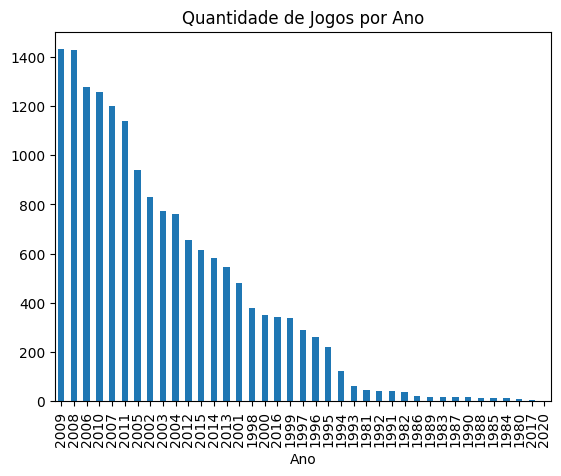

In [71]:
df_ano = df['Ano'].value_counts().plot(kind='bar', title='Quantidade de Jogos por Ano')


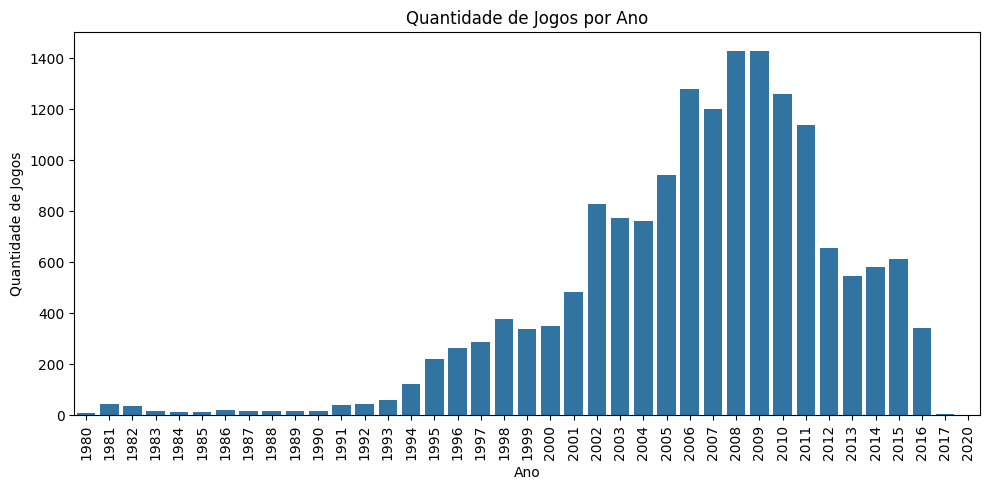

In [78]:
# Calculate the count of games per year
year_counts = df['Ano'].value_counts().reset_index()
year_counts.columns = ['Ano', 'Quantidade'] # Rename columns for clarity

plt.figure(figsize=(10, 5)) # Corrected: figsize takes a tuple
sns.barplot(x='Ano', y='Quantidade', data=year_counts) # Corrected: Use the year_counts DataFrame
plt.title("Quantidade de Jogos por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Jogos")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

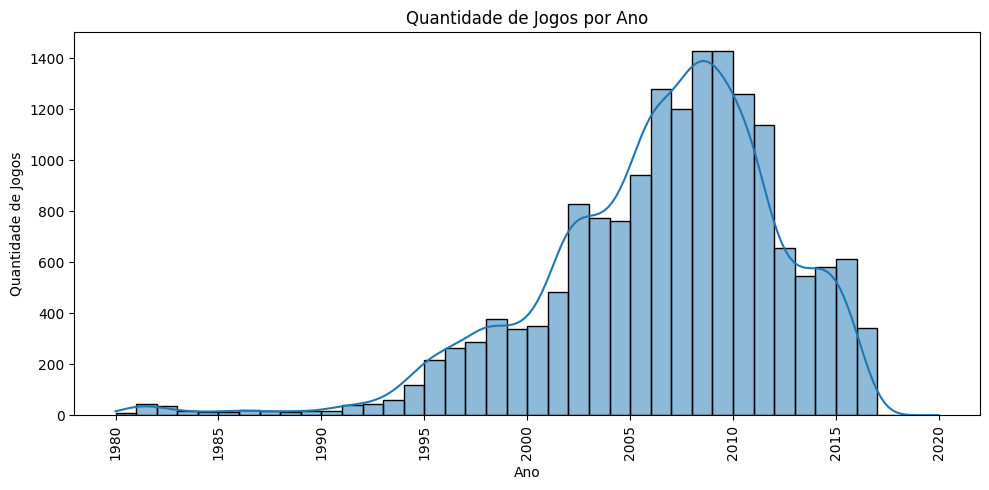

In [85]:
# Calculate the count of games per year
year_counts = df['Ano'].value_counts().reset_index()
year_counts.columns = ['Ano', 'Quantidade'] # Rename columns for clarity

plt.figure(figsize=(10, 5)) # Corrected: figsize takes a tuple
sns.histplot(df['Ano'], bins=40,kde=True) # Corrected: Use the year_counts DataFrame
plt.title("Quantidade de Jogos por Ano")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Jogos")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()